## Observations and Insights 

In [140]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
#   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
# 0     k403     Ramicane    Male          21          16
# 1     s185    Capomulin  Female           3          17
# 2     x401    Capomulin  Female          16          15
# 3     m601    Capomulin    Male          22          17
# 4     g791     Ramicane    Male          11          16

study_results = pd.read_csv(study_results_path)
#   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
# 0     b128          0                45.0                 0
# 1     f932          0                45.0                 0
# 2     g107          0                45.0                 0
# 3     a457          0                45.0                 0
# 4     c819          0                45.0                 0

# Combine the data into a single dataset based on Mouse ID
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [51]:
# Checking the number of mice.
def num_mice(dataframe):
    df_mice = dataframe.groupby('Mouse ID').nunique()
    num_mice = len(df_mice.index)
    print(num_mice)
    return num_mice
num_mice(df)

249


249

In [262]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
sorted_df = df.sort_values(["Mouse ID", "Timepoint"])
no_duplicates = sorted_df.groupby(['Mouse ID','Timepoint']).max()
no_duplicates.reset_index(inplace=True)
no_duplicates

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,0,Infubinol,Female,20,23,45.000000,0
1,a203,5,Infubinol,Female,20,23,48.508468,0
2,a203,10,Infubinol,Female,20,23,51.852437,1
3,a203,15,Infubinol,Female,20,23,52.777870,1
4,a203,20,Infubinol,Female,20,23,55.173336,1
...,...,...,...,...,...,...,...,...
1883,z969,25,Naftisol,Male,9,30,63.145652,2
1884,z969,30,Naftisol,Male,9,30,65.841013,3
1885,z969,35,Naftisol,Male,9,30,69.176246,4
1886,z969,40,Naftisol,Male,9,30,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [263]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates = df.dropna(how='any')

In [266]:
# Checking the number of mice in the clean DataFrame.
num_mice(df)

249


249

In [ ]:
# Pandas Aggregate Functions:
# mean(): Compute mean of groups
# sum(): Compute sum of group values
# size(): Compute group sizes
# count(): Compute count of group
# std(): Standard deviation of groups
# var(): Compute variance of groups
# sem(): Standard error of the mean of groups
# describe(): Generates descriptive statistics
# first(): Compute first of group values
# last(): Compute last of group values
# nth() : Take nth value, or a subset if n is a list
# min(): Compute min of group values
# max(): Compute max of group values

## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Drug Regimen	Sex	Age_months	Weight (g)	Tumor Volume (mm3)	Metastatic Sites Mouse ID	Timepoint	

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().rename('Mean')
tumor_variance = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var().rename('Variance')
tumor_std = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std().rename('STD')
tumor_SEM = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem().rename('SEM')

# print(f'Mean: {tumor_mean.head()}')
# print(f'Variance: {tumor_variance.head()}')
# print(f'Standard Deviation: {tumor_std.head()}')
# print(f'SEM: {tumor_SEM.head()}')

# Assemble the resulting series into a single summary dataframe.
stats = pd.merge(tumor_mean,tumor_variance,on='Drug Regimen')
stats = pd.merge(stats, tumor_std,on='Drug Regimen')
stats = pd.merge(stats, tumor_SEM,on='Drug Regimen')
stats.head()

,Mean,Variance,STD,SEM
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466


In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#stats.describe()
# Using the aggregation method, produce the same summary statistics in a single line
stats.apply(pd.Series.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,4.0,17.736906,18.650931,0.329346,3.828417,14.971269,28.879758,40.675741
Ceftamin,4.0,24.654839,25.282510,0.469821,4.818596,22.779182,42.615426,52.591172
Infubinol,4.0,25.768240,26.103941,0.492236,5.048491,24.847964,45.567712,52.884795
Ketapril,4.0,33.168196,33.758801,0.603860,6.360747,31.757673,58.565123,68.553577
Naftisol,4.0,32.309054,32.771316,0.596466,6.250148,31.233136,57.292043,66.173479
Placebo,4.0,30.900999,31.108312,0.581331,6.011085,30.927292,55.817206,61.168083
Propriva,4.0,25.423569,25.745195,0.512884,5.009048,24.429420,44.843940,52.322552
Ramicane,4.0,17.217678,18.319460,0.320955,3.714970,14.166506,27.669214,40.216745
Stelasyn,4.0,30.491810,30.639739,0.573111,5.926092,30.971784,55.537502,59.450562


## Bar and Pie Charts

<AxesSubplot:title={'center':'Measurements for each Drug'}, xlabel='Drugs', ylabel='Number of Measurements'>

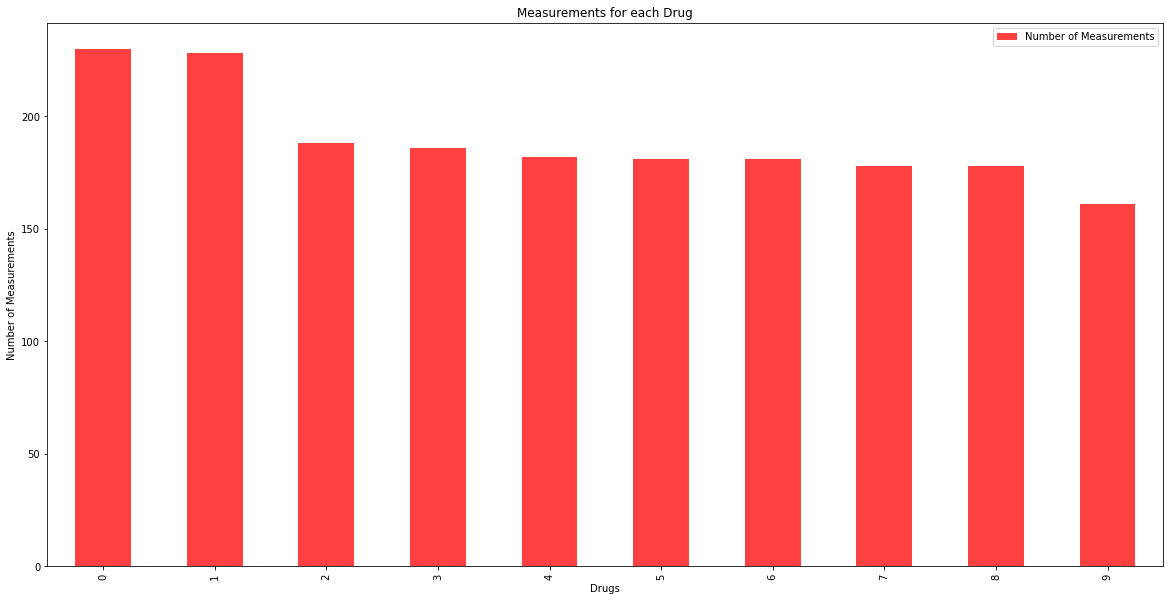

In [307]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Filter the DataFrame down only to those columns to chart
drug_counts = df['Drug Regimen'].value_counts()

bar_chart_df = pd.DataFrame(drug_counts)
bar_chart_df.reset_index(inplace=True)
bar_chart_df = bar_chart_df.rename(columns = {'index':'Drugs','Drug Regimen': 'Number of Measurements'})

# Use DataFrame.plot() in order to create a bar chart of the data
bar_chart_df.plot(kind="bar",xlabel='Drugs',ylabel='Number of Measurements', title="Measurements for each Drug",alpha=0.75,figsize=(20,10),color='red')

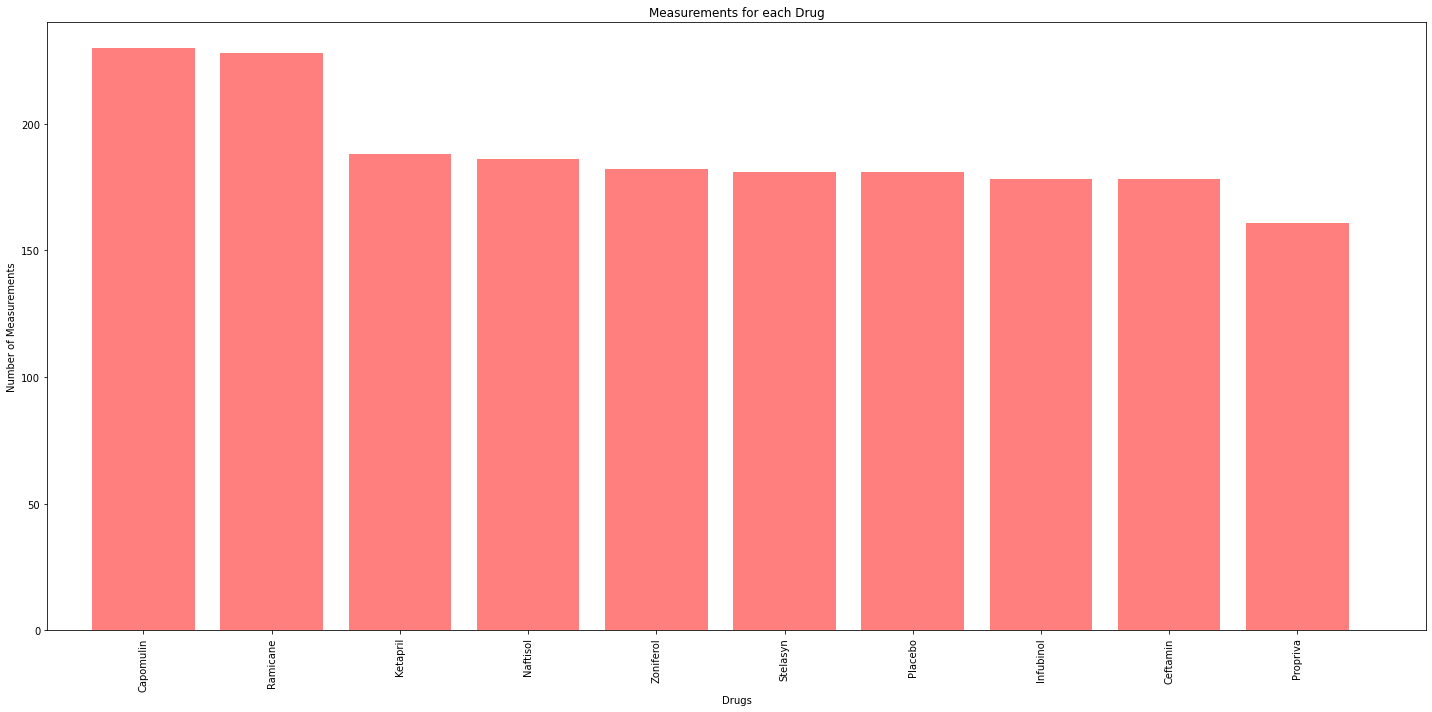

In [189]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(bar_chart_df))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(x_axis, bar_chart_df['Number of Measurements'], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, bar_chart_df['Drugs'], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(bar_chart_df["Number of Measurements"])+10)

# Set a Title and labels
plt.title("Measurements for each Drug")
plt.xlabel("Drugs")
plt.ylabel("Number of Measurements")
    
# Save our graph and show the grap
plt.tight_layout()
plt.show()

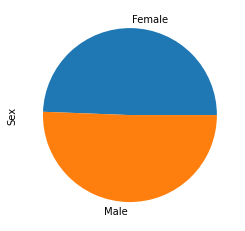

In [259]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = df.groupby(['Sex'])['Sex'].count()
pie = sex.plot.pie(y=sex)

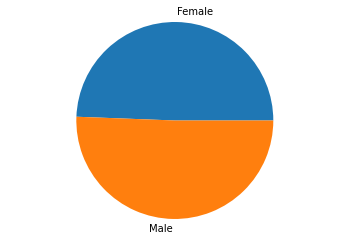

In [261]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex,labels=sex.index)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [340]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tp = no_duplicates[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
final_tp = final_tp.rename(columns = {'Drug Regimen':'Drugs','Tumor Volume (mm3)':'TumorVolume_mm3'})
final_tp = final_tp.loc[final_tp.Timepoint == 45]

In [381]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = final_tp.groupby('Drugs').nunique().index
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

drug_regimen_list = final_tp['Drugs'].tolist()
tumor_vol_list = final_tp['TumorVolume_mm3'].tolist()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumors = final_tp['TumorVolume_mm3']

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

df_outliers = tumors.loc[(tumors < lower_bound) | (tumors > upper_bound)] #None
print(df_outliers)

Series([], Name: TumorVolume_mm3, dtype: float64)


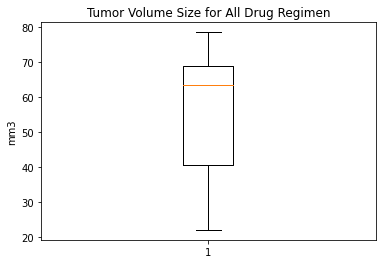

In [385]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Size for All Drug Regimen')
ax1.set_ylabel('mm3')
ax1.boxplot(tumors)
plt.show()

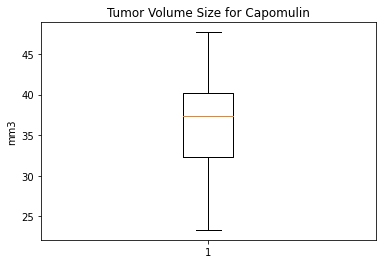

In [389]:
drug_and_tumor = final_tp[['Drugs','TumorVolume_mm3']]
capomulin_tumors = drug_and_tumor.loc[drug_and_tumor.Drugs == 'Capomulin']
ramicane_tumors = drug_and_tumor.loc[drug_and_tumor.Drugs == 'Ramicane']
infubinol_tumors = drug_and_tumor.loc[drug_and_tumor.Drugs == 'Infubinol']
ceftamin_tumors = drug_and_tumor.loc[drug_and_tumor.Drugs == 'Ceftamin']

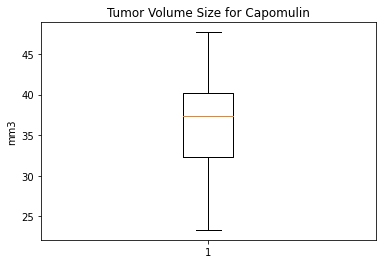

In [390]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Size for Capomulin')
ax1.set_ylabel('mm3')
ax1.boxplot(capomulin_tumors['TumorVolume_mm3'])
plt.show()

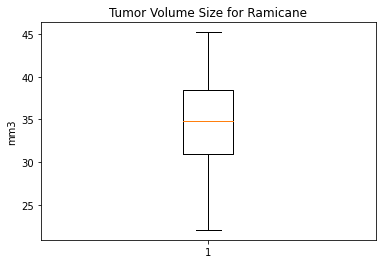

In [393]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Size for Ramicane')
ax1.set_ylabel('mm3')
ax1.boxplot(ramicane_tumors['TumorVolume_mm3'])
plt.show()

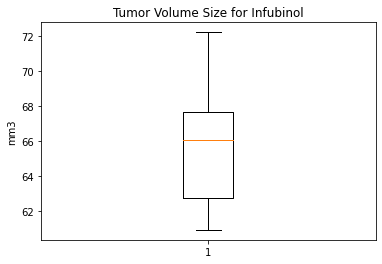

In [392]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Size for Infubinol')
ax1.set_ylabel('mm3')
ax1.boxplot(infubinol_tumors['TumorVolume_mm3'])
plt.show()

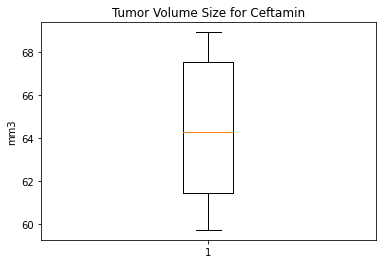

In [391]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Size for Ceftamin')
ax1.set_ylabel('mm3')
ax1.boxplot(ceftamin_tumors['TumorVolume_mm3'])
plt.show()

## Line and Scatter Plots

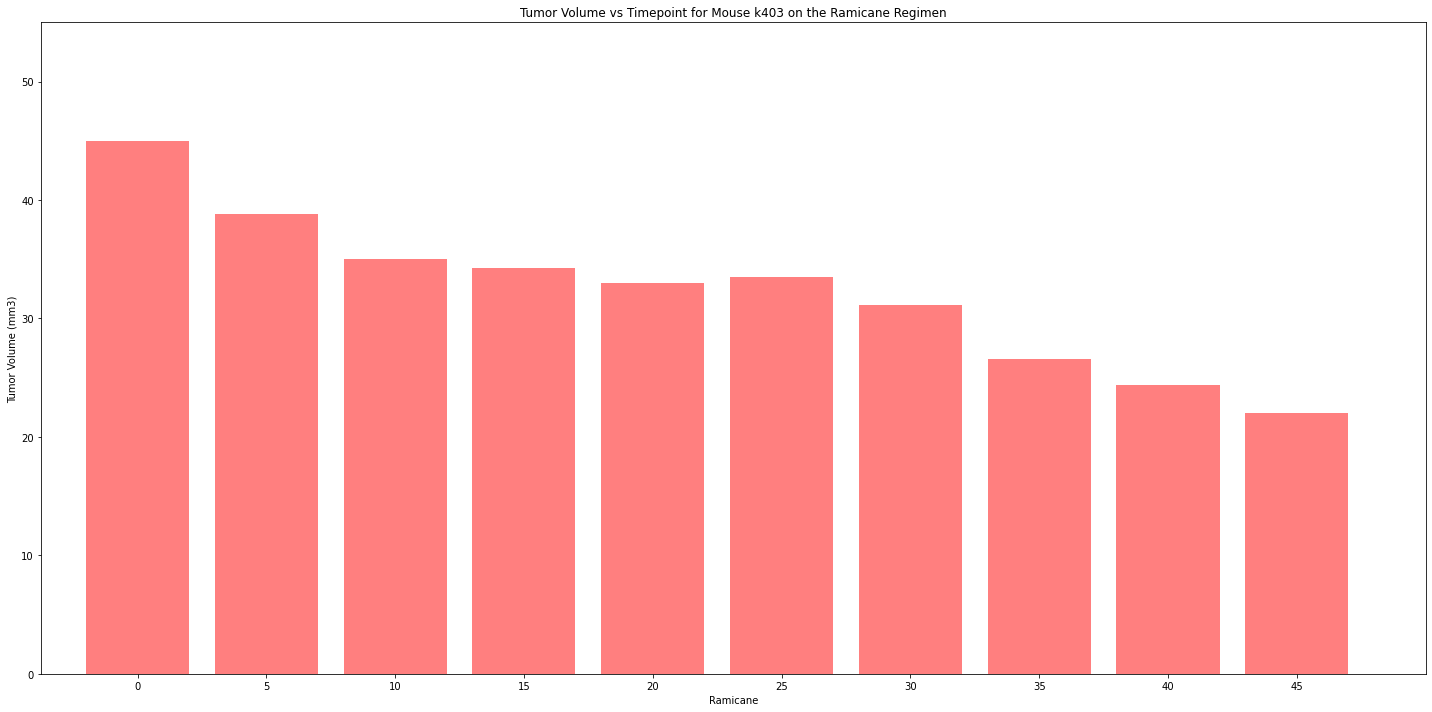

In [373]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = no_duplicates.head(10)
tp_vs_vol = mouse[['Timepoint','Tumor Volume (mm3)']]
drug = mouse['Drug Regimen'][0]
mouse_id = mouse['Mouse ID'][0]

# Set x axis and tick locations
x_axis = np.arange(len(tp_vs_vol))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(x_axis, tp_vs_vol['Tumor Volume (mm3)'], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, tp_vs_vol['Timepoint'])

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(tp_vs_vol["Tumor Volume (mm3)"])+10)

# Set a Title and labels
plt.title(f'Tumor Volume vs Timepoint for Mouse {mouse_id} on the {drug} Regimen')
plt.xlabel(drug)
plt.ylabel("Tumor Volume (mm3)")
    
# Save our graph and show the grap
plt.tight_layout()
plt.show()

In [414]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter_data = no_duplicates[['Drug Regimen','Weight (g)','Tumor Volume (mm3)']]
capomulin_scatter_data = capomulin_scatter_data.rename(columns = {'Drug Regimen':'Drugs','Weight (g)':'Weight','Tumor Volume (mm3)':'TumorVolume'})
capomulin_scatter_data = capomulin_scatter_data.loc[capomulin_scatter_data.Drugs == 'Capomulin']
capomulin_scatter_data = capomulin_scatter_data[['Weight','TumorVolume']]


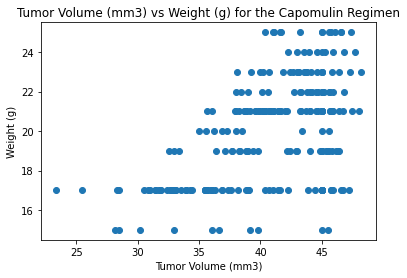

In [427]:
tumor_vol = capomulin_scatter_data.TumorVolume
weight = capomulin_scatter_data.Weight
plt.scatter(tumor_vol,weight)
plt.title(f'Tumor Volume (mm3) vs Weight (g) for the Capomulin Regimen')
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

## Correlation and Regression

In [420]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between Tumor Volume and Weight is {round(st.pearsonr(tumor_vol,weight)[0],2)}")

The correlation coefficient between Tumor Volume and Weight is 0.53


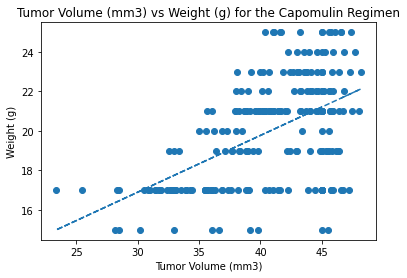

In [426]:
tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(tumor_vol, weight)
tw_fit = tw_slope * tumor_vol + tw_int

tumor_vol = capomulin_scatter_data.TumorVolume
weight = capomulin_scatter_data.Weight
plt.scatter(tumor_vol,weight)
plt.plot(tumor_vol,tw_fit,'--')
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title(f'Tumor Volume (mm3) vs Weight (g) for the Capomulin Regimen')
plt.show()